In [60]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

import cv2
import matplotlib.pyplot as plt

import random
import numpy as np
#from dataPreprocess import imgPrepare

In [2]:
# Global variable: Base Directory Path
DIR = './'
img_size = 256

## Load .jpg and convert to array

In [3]:
def imgPrepare(object):
    imgDir = DIR + object
    saveDir = DIR + 'resized_' + object

    # Creating new directory
    if not os.path.isdir(saveDir):
        print('\nThe directory is not present. Creating a new one..\n')
        os.mkdir(saveDir)
    else:
        print('\nThe directory is present.\n')


    imgList = os.listdir(imgDir)
    n = len(imgList)
    imgDataset = []
    count = 1
    for i in range(n):
        imgPath = imgDir + imgList[i]
        
        if (os.path.exists(imgPath)):
            # Load Image
            img = cv2.imread(imgPath)
            #print(f"{imgPath}, img.shape: {img.shape}")

            # Resize Image
            resizedImg = cv2.resize(img, (img_size, img_size))  
            #print(f"resizedImg.shape: {resizedImg.shape}", end='\n\n')

            # BGR to RGB
            rgbImg = cv2.cvtColor(resizedImg, cv2.COLOR_BGR2RGB)
            
            # Put the image to array
            imgDataset.append(rgbImg)

            '''
            # Write Resized Image
            imgName = object[:-1] + str(count) + '.jpg'
            imgWritePath = saveDir + imgName
            #print(imgWritePath, imgList[i])
            cv2.imwrite(imgWritePath, resizedImg)

            count = count + 1
            '''

        else:
            print(f"{imgPath} not exists")
    
    # Convert the list to numpy array\
    imgDataset = np.array(imgDataset, dtype=np.uint8)
    #print(f"imgDataset.shape: {imgDataset.shape}", end='\n\n')
    
    return imgDataset

In [11]:
def preprocess_data():

    # Load Car Image Data
    clock = 'clock/'
    clockData = imgPrepare(clock)
    n = clockData.shape[0]
    print(f"clockData.shape: {clockData.shape}")

    # Load Hen Image Data
    pillow = 'pillow/'
    pillowData = imgPrepare(pillow)
    m = pillowData.shape[0]
    print(f"pillowData.shape: {pillowData.shape}")

    # Concatenating carData and henData
    imgDB = np.concatenate((clockData, pillowData), axis=0)
    print(f"\nimgDB.shape: {imgDB.shape}")
    print(imgDB.max(), imgDB.min())
    # Prepare Data
    clockLabel = np.zeros(n, dtype=np.uint8)
    pillowLabel = np.ones(m, dtype=np.uint8)

    #print(clockLabel)
    #print(pillowLabel)

    # Concatenate label
    labelDB = np.concatenate((clockLabel, pillowLabel))
    print(f"\n{labelDB}\nlabelDB.shape: {labelDB.shape}")

    # To Categorical
    labelDB = to_categorical(labelDB)
    print(f"\nlabelDB TO_Categorical: \n{labelDB}")

    # Shuffle Data
    print("\n\nShuffle data\n")
    n = imgDB.shape[0]

    indeces = np.arange(n)
    #print(indeces)
    random.shuffle(indeces)
    #print(indeces)
    imgDB = imgDB[indeces]
    labelDB = labelDB[indeces]

    # split train test data
    m = int(n*0.7)
    trainX = imgDB[:m]
    testX = imgDB[m:]

    trainY = labelDB[:m]
    testY = labelDB[m:]
    
    return trainX, trainY, testX, testY

### Print model summary

In [12]:
def modelSummary(model):
    print()
    model.summary()
    print()

## Create base model using transfer learning

### Loading the array

In [18]:
trainX, trainY, testX, testY = preprocess_data()

print("\n\nShapes of train test data.\n")
print(f"trainX.shape: {trainX.shape}\n")
print(f"trainY.shape: {trainY.shape}\n")
print(f"testX.shape: {testX.shape}\n")
print(f"testY.shape: {testY.shape}\n")


The directory is present.

clockData.shape: (111, 256, 256, 3)

The directory is present.

pillowData.shape: (118, 256, 256, 3)

imgDB.shape: (229, 256, 256, 3)
255 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
labelDB.shape: (229,)

labelDB TO_Categorical: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [

In [48]:
def buildModel():

    '''
    Original Model
    '''
    baseModel = VGG16(include_top = False, input_shape=(256, 256, 3))
    
    inputs = baseModel.input
    baseModelOutput = baseModel.output

    '''
    Our Model
    '''
    fc = Flatten()(baseModelOutput)
    fc = Dense(512, activation='relu')(fc)
    fc = Dense(128, activation='relu')(fc)
    fc = Dense(64, activation='relu')(fc)
    fc = Dense(16, activation='relu')(fc)
    outputs = Dense(2, activation='softmax')(fc)
    
    '''
    Concatening Original model and our model
    '''
    our_model = Model(inputs, outputs, name='VGG_CLOCK_PILLOW_MODEL')
    
    '''
    Making the main network non-trainable
    '''
    for layer in baseModel.layers:
        layer.trainable = False
    
    #Compile Model
    learning_rate= 5e-5
    opt = Adam(learning_rate=learning_rate)
    
    our_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return our_model

In [49]:
def train_model(trainX, trainY, testX, testY):

    model = buildModel()
    modelSummary(model)
    
    # Train model
    my_callbacks = [EarlyStopping(monitor='loss', patience=3)]

    model.fit(trainX, trainY,
              epochs = 10,
              callbacks=my_callbacks)
    
    model.evaluate(testX, testY)

    # Calling `save('clock_pillow_model.h5')` creates a h5 file `clock_pillow_model.h5`.
    model.save("clock_pillow_model.h5")

In [50]:
train_model(trainX, trainY, testX, testY)


Model: "VGG_CLOCK_PILLOW_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64,

In [53]:
model = load_model("clock_pillow_model.h5")
modelSummary(model)


Model: "VGG_CLOCK_PILLOW_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64,

In [68]:
def preprocess_test_data():

    # Load Car Image Data
    clock = 'test_clock/'
    clockData = imgPrepare(clock)
    n = clockData.shape[0]
    print(f"clockData.shape: {clockData.shape}")

    # Load Hen Image Data
    pillow = 'test_pillow/'
    pillowData = imgPrepare(pillow)
    m = pillowData.shape[0]
    print(f"pillowData.shape: {pillowData.shape}")

    # Concatenating carData and henData
    imgDB = np.concatenate((clockData, pillowData), axis=0)
    print(f"\nimgDB.shape: {imgDB.shape}")
    print(imgDB.max(), imgDB.min())
    
    # Prepare Data
    clockLabel = np.zeros(n, dtype=np.uint8) # clockLabel --> 0
    pillowLabel = np.ones(m, dtype=np.uint8) # pillowLable --> 1

    #print(clockLabel)
    #print(pillowLabel)

    # Concatenate label
    labelDB = np.concatenate((clockLabel, pillowLabel))
    print(f"\n{labelDB}\nlabelDB.shape: {labelDB.shape}")

    # To Categorical
    labelDB = to_categorical(labelDB)
    print(f"\nlabelDB TO_Categorical: \n{labelDB}")

    # Shuffle Data
    print("\n\nShuffle data\n")
    n = imgDB.shape[0]

    indeces = np.arange(n)
    #print(indeces)
    random.shuffle(indeces)
    #print(indeces)
    imgDB = imgDB[indeces]
    labelDB = labelDB[indeces]
    
    return imgDB, labelDB

In [69]:
def plot_predicted_data(test_imgDB, test_labelDB, model):
    plt.figure(figsize=(20, 20))

    predictedY = model.predict(test_imgDB)

    n=6
    for i in range(n):
        print(f'\n\nindex:-{i+1}  Predicted Value: {np.argmax(predictedY[i])}\n')

        plt.subplot(3, 3, i+1)
        plt.imshow(test_imgDB[i], cmap = 'gray')
        plt.title(np.argmax(test_labelDB[i]))
    
    plt.show()
    plt.close()


The directory is present.

clockData.shape: (3, 256, 256, 3)

The directory is present.

pillowData.shape: (3, 256, 256, 3)

imgDB.shape: (6, 256, 256, 3)
255 0

[0 0 0 1 1 1]
labelDB.shape: (6,)

labelDB TO_Categorical: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Shuffle data



index:-1  Predicted Value: 0



index:-2  Predicted Value: 0



index:-3  Predicted Value: 1



index:-4  Predicted Value: 1



index:-5  Predicted Value: 0



index:-6  Predicted Value: 0



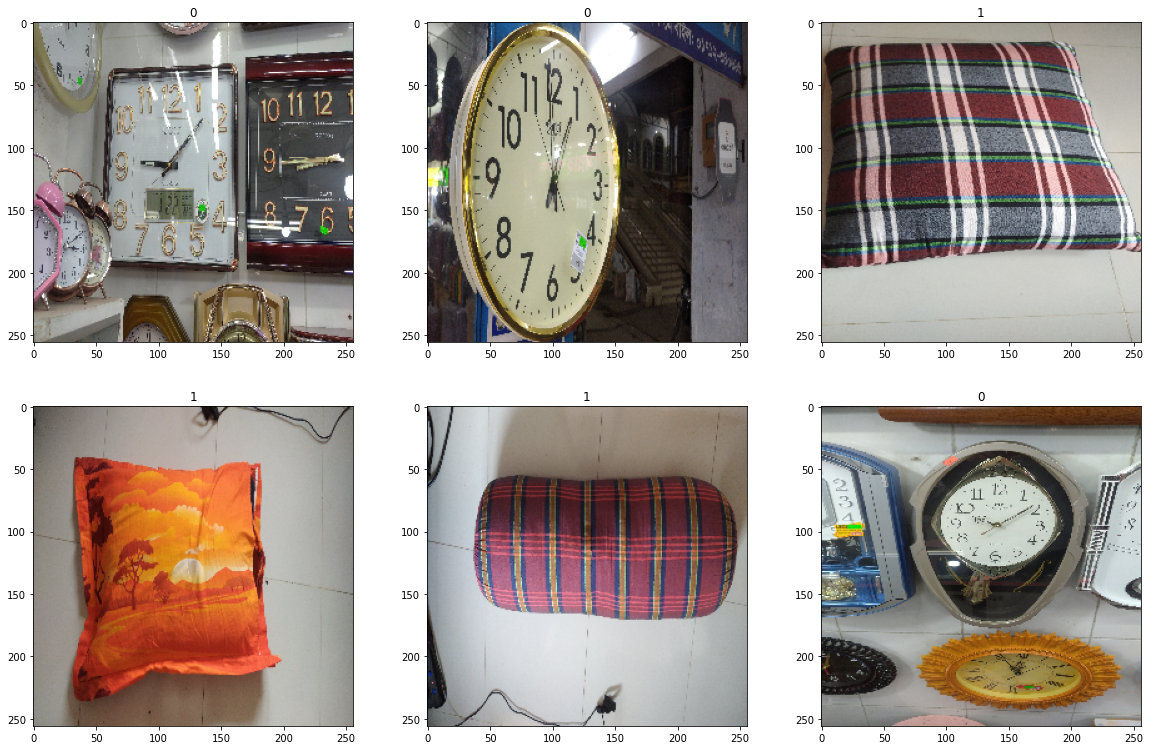

In [71]:
test_imgDB, test_labelDB = preprocess_test_data()
plot_predicted_data(test_imgDB, test_labelDB, model)

In [17]:
def main(): 
    
    # Creating training and testing array from the raw data
    trainX, trainY, testX, testY = preprocess_data()
    
    print("\n\nShapes of train test data.\n")
    print(f"trainX.shape: {trainX.shape}\n")
    print(f"trainY.shape: {trainY.shape}\n")
    print(f"testX.shape: {testX.shape}\n")
    print(f"testY.shape: {testY.shape}\n")

In [16]:
if __name__ == "__main__":
    main()


The directory is present.

clockData.shape: (111, 256, 256, 3)

The directory is present.

pillowData.shape: (118, 256, 256, 3)

imgDB.shape: (229, 256, 256, 3)
255 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
labelDB.shape: (229,)

labelDB TO_Categorical: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [